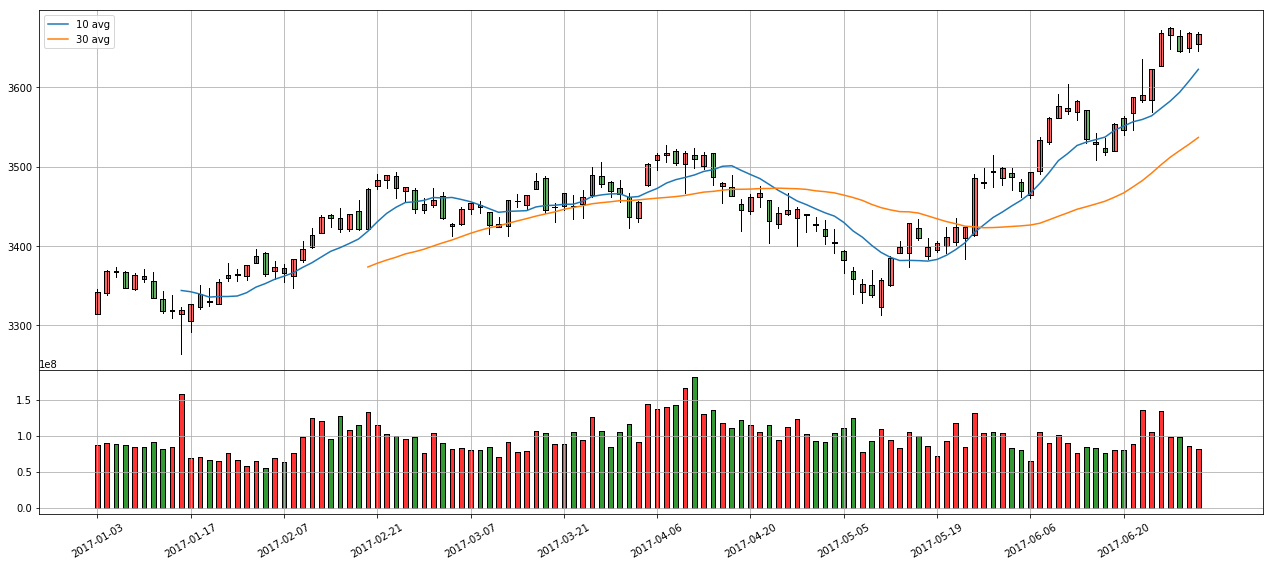

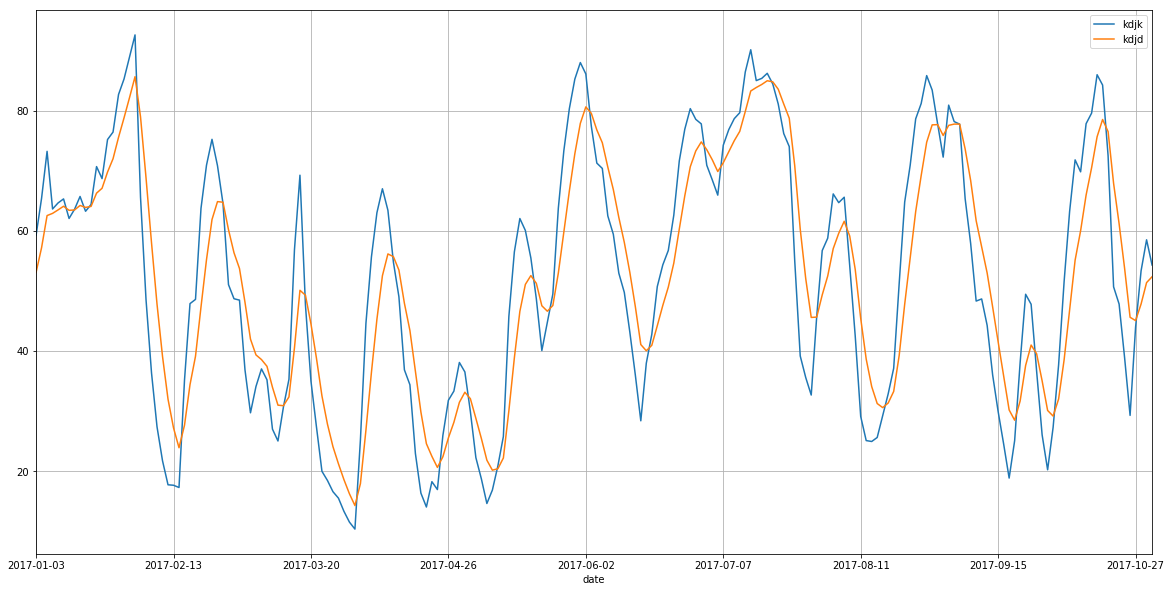

In [13]:
import talib
import numpy as np
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib.finance as mpf

data = ts.get_k_data('399300', index=True, start='2017-01-01', end='2017-06-31')
sma_10 = talib.SMA(np.array(data['close']), 10)
sma_30 = talib.SMA(np.array(data['close']), 30)

fig = plt.figure(figsize=(17, 10))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])

mpf.candlestick2_ochl(ax, data['open'], data['close'], data['high'], data['low'], 
                     width=0.5, colorup='r', colordown='g', alpha=0.6)
ax.set_xticks(range(0, len(data['date']), 10))
ax.plot(sma_10, label='10 avg')
ax.plot(sma_30, label='30 avg')
ax.legend(loc='upper left')
ax.grid(True)

mpf.volume_overlay(ax2, data['open'], data['close'], data['volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(data['date']), 10))
ax2.set_xticklabels(data['date'][::10], rotation=30)
ax2.grid(True)

plt.show()


import pandas as pd
import stockstats

begin_time = '2017-01-01'
end_time = '2017-11-01'
code = "000001"
stock = ts.get_hist_data(code, start=begin_time, end=end_time)
stock["date"] = stock.index.values #增加日期列。
stock = stock.sort_index(0) # 将数据按照日期排序下。
#print(stock) [186 rows x 14 columns]
#初始化统计类
#stockStat = stockstats.StockDataFrame.retype(pd.read_csv('002032.csv'))
stockStat = stockstats.StockDataFrame.retype(stock)

stockStat[['kdjk','kdjd'] # 分别是k d j 三个数据统计项。
         ].plot(subplots=False,figsize=(20,10), grid=True)
plt.show()